
# 🌦️ Phân tích & Tiền xử lý Dữ liệu Thời tiết TP.HCM

**Mục tiêu:** Phân tích dữ liệu thời tiết (theo giờ & theo ngày) của TP.HCM, kiểm tra dữ liệu thiếu, trùng, ngoại lai, và đánh giá sơ bộ tình hình dữ liệu.  
**Notebook:** `HCM_Data_Analysis.ipynb`

---


In [14]:

# I. IMPORT THƯ VIỆN VÀ CÀI ĐẶT CƠ BẢN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hiển thị đẹp và set style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)



## 📊 PHẦN 1 — PHÂN TÍCH DỮ LIỆU TP.HCM THEO GIỜ (`HCMWeatherHourly.xlsx`)

In [15]:

# Đọc dữ liệu theo giờ TP.HCM
path_hcm_hourly = "/Users/user/Desktop/HCM/HCMWeatherHourly.xlsx"
try:
    df_hcm_hourly = pd.read_excel(path_hcm_hourly, engine='openpyxl')
except Exception as e:
    print("Lỗi khi đọc file hourly:", e)
    raise

print("Kích thước dữ liệu hourly:", df_hcm_hourly.shape)
display(df_hcm_hourly.head())


Kích thước dữ liệu hourly: (94434, 24)


,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"10.82, 106.67",2015-01-01T00:00:00,24.9,24.9,19.0,69.35,0.0,0,NaN,0.0,0.0,9.4,3.6,240.0,1012.0,50.0,7.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"48900099999,VVTS"
1,"10.82, 106.67",2015-01-01T01:00:00,24.9,24.9,20.0,73.79,0.0,0,NaN,0.0,0.0,9.0,3.6,290.0,1012.0,50.0,7.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"48894099999,48900099999,VVTS"
2,"10.82, 106.67",2015-01-01T02:00:00,24.0,24.0,20.0,78.35,0.0,0,NaN,0.0,0.0,6.5,5.4,320.0,1012.0,50.0,7.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"48900099999,VVTS"
3,"10.82, 106.67",2015-01-01T03:00:00,24.0,24.0,20.0,78.35,0.0,0,NaN,0.0,0.0,6.8,5.4,330.0,1012.0,50.0,6.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"48900099999,VVTS"
4,"10.82, 106.67",2015-01-01T04:00:00,24.0,24.0,20.9,83.33,0.0,0,NaN,0.0,0.0,9.0,5.4,340.0,1012.0,50.0,6.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"48894099999,48900099999,VVTS"


In [16]:

# Kiểm tra kiểu dữ liệu và thống kê mô tả (hourly)
df_hcm_hourly.info()
display(df_hcm_hourly.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94434 entries, 0 to 94433
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              94434 non-null  object 
 1   datetime          94434 non-null  object 
 2   temp              94434 non-null  float64
 3   feelslike         94434 non-null  float64
 4   dew               94434 non-null  float64
 5   humidity          94434 non-null  float64
 6   precip            94395 non-null  float64
 7   precipprob        94434 non-null  int64  
 8   preciptype        12667 non-null  object 
 9   snow              94392 non-null  float64
 10  snowdepth         94392 non-null  float64
 11  windgust          94385 non-null  float64
 12  windspeed         94434 non-null  float64
 13  winddir           94424 non-null  float64
 14  sealevelpressure  94434 non-null  float64
 15  cloudcover        94434 non-null  float64
 16  visibility        94236 non-null  float6

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
count,94434,94434,94434.000000,94434.000000,94434.000000,94434.000000,94395.000000,94434.000000,12667,94392.0,94392.0,94385.000000,94434.000000,94424.000000,94434.000000,94434.000000,94236.000000,94398.000000,94398.000000,94398.000000,32831.000000,94434,94434,94434
unique,1,94434,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,8,8
top,"10.82, 106.67",2015-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partially cloudy,partly-cloudy-night,"48900099999,VVTS"
freq,94434,1,NaN,NaN,NaN,NaN,NaN,NaN,12667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80057,40099,61356
mean,NaN,NaN,28.448569,31.648035,23.494331,76.545719,0.217408,10.403033,NaN,0.0,0.0,18.145033,10.184221,186.428888,1009.074148,53.161619,9.324074,213.222399,0.767100,2.127174,16.301240,NaN,NaN,NaN
std,NaN,NaN,2.967828,5.200035,2.542747,16.238712,2.441659,30.530150,NaN,0.0,0.0,9.187602,5.811723,93.380100,2.501664,24.965665,1.485902,287.768962,1.036611,2.888216,11.886242,NaN,NaN,NaN
min,NaN,NaN,18.000000,18.000000,2.000000,12.550000,0.000000,0.000000,NaN,0.0,0.0,0.700000,0.000000,0.000000,999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,NaN,NaN,NaN
25%,NaN,NaN,26.000000,26.000000,22.000000,65.550000,0.000000,0.000000,NaN,0.0,0.0,10.800000,5.400000,120.000000,1007.000000,25.000000,9.000000,0.000000,0.000000,0.000000,10.000000,NaN,NaN,NaN
50%,NaN,NaN,28.000000,31.800000,24.000000,78.910000,0.000000,0.000000,NaN,0.0,0.0,16.900000,9.400000,189.000000,1009.000000,50.000000,10.000000,6.900000,0.000000,0.000000,10.000000,NaN,NaN,NaN
75%,NaN,NaN,30.900000,35.500000,25.000000,88.910000,0.000000,0.000000,NaN,0.0,0.0,23.800000,13.000000,258.600000,1011.000000,88.000000,10.000000,424.600000,1.500000,4.000000,30.000000,NaN,NaN,NaN


In [17]:

# Kiểm tra missing values và duplicates (hourly)
missing_h = df_hcm_hourly.isnull().sum()
missing_pct_h = (df_hcm_hourly.isnull().mean() * 100).round(2)
print("Số lượng giá trị thiếu (hourly):\n", missing_h)
print("\nTỷ lệ thiếu (%) (hourly):\n", missing_pct_h)

dupes_h = df_hcm_hourly.duplicated().sum()
print(f"\nSố dòng trùng lặp (hourly): {dupes_h}")


Số lượng giá trị thiếu (hourly):
 name                    0
datetime                0
temp                    0
feelslike               0
dew                     0
humidity                0
precip                 39
precipprob              0
preciptype          81767
snow                   42
snowdepth              42
windgust               49
windspeed               0
winddir                10
sealevelpressure        0
cloudcover              0
visibility            198
solarradiation         36
solarenergy            36
uvindex                36
severerisk          61603
conditions              0
icon                    0
stations                0
dtype: int64

Tỷ lệ thiếu (%) (hourly):
 name                 0.00
datetime             0.00
temp                 0.00
feelslike            0.00
dew                  0.00
humidity             0.00
precip               0.04
precipprob           0.00
preciptype          86.59
snow                 0.04
snowdepth            0.04
windgust       

In [18]:

# Phát hiện outliers bằng phương pháp IQR (hourly)
numeric_cols_h = df_hcm_hourly.select_dtypes(include=[np.number]).columns

Q1_h = df_hcm_hourly[numeric_cols_h].quantile(0.25)
Q3_h = df_hcm_hourly[numeric_cols_h].quantile(0.75)
IQR_h = Q3_h - Q1_h

outliers_h = ((df_hcm_hourly[numeric_cols_h] < (Q1_h - 1.5 * IQR_h)) | 
              (df_hcm_hourly[numeric_cols_h] > (Q3_h + 1.5 * IQR_h))).sum()

print("Số lượng outliers (theo từng cột) - hourly:\n", outliers_h)


Số lượng outliers (theo từng cột) - hourly:
 temp                   6
feelslike              0
dew                 2943
humidity             122
precip              9824
precipprob          9824
snow                   0
snowdepth              0
windgust            1288
windspeed           1419
winddir                0
sealevelpressure      42
cloudcover             0
visibility          8649
solarradiation         0
solarenergy            0
uvindex                0
severerisk            14
dtype: int64


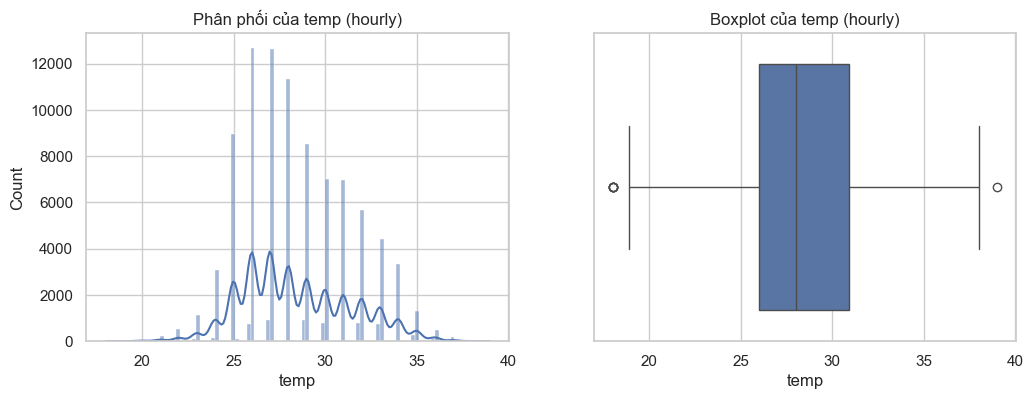

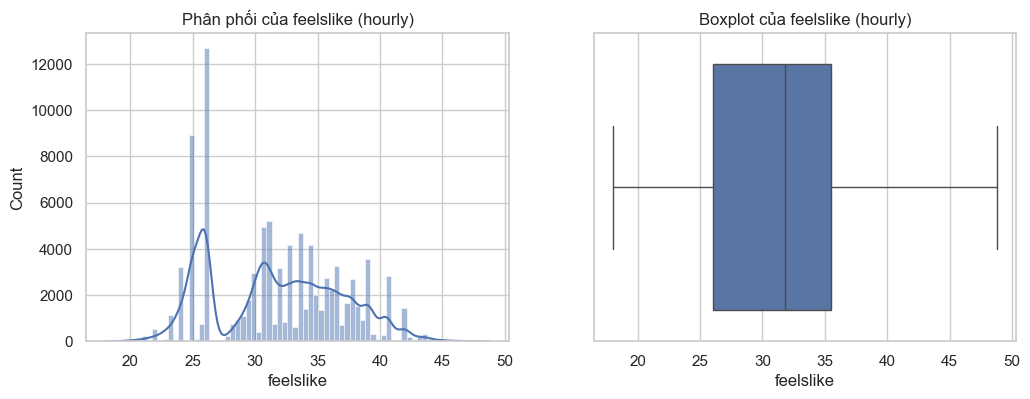

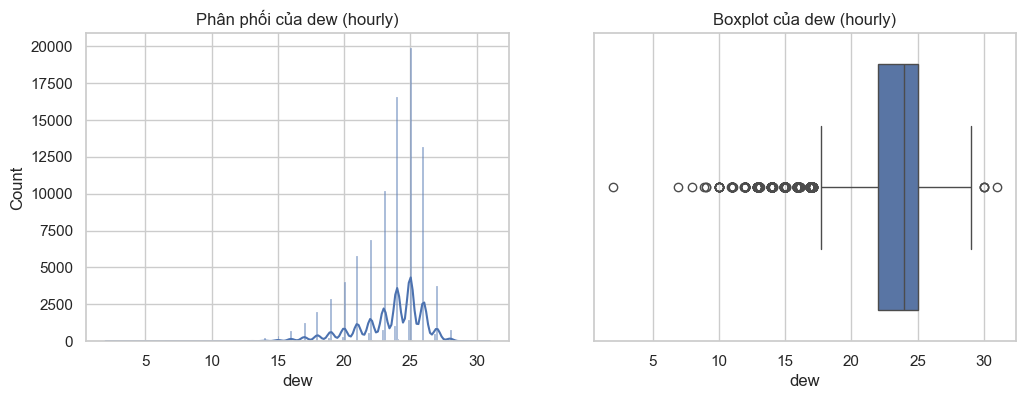

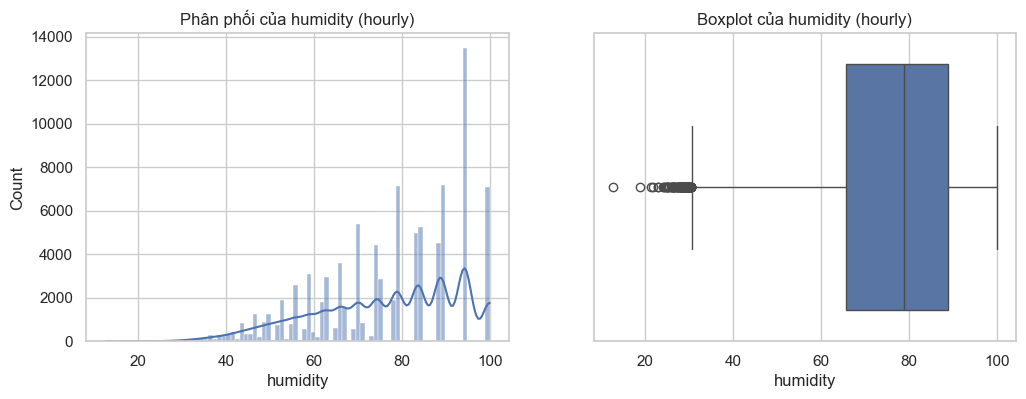

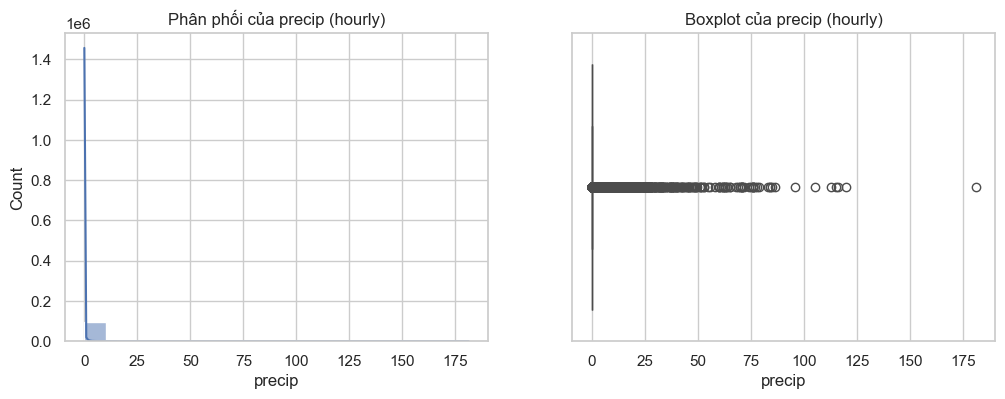

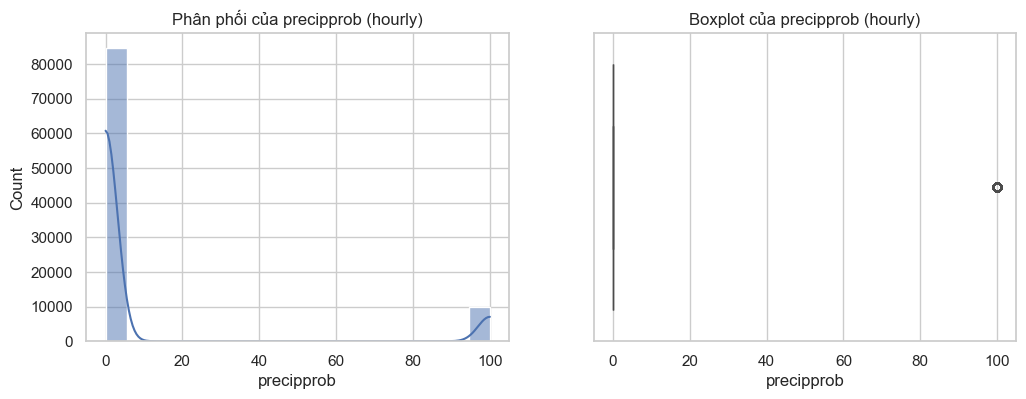

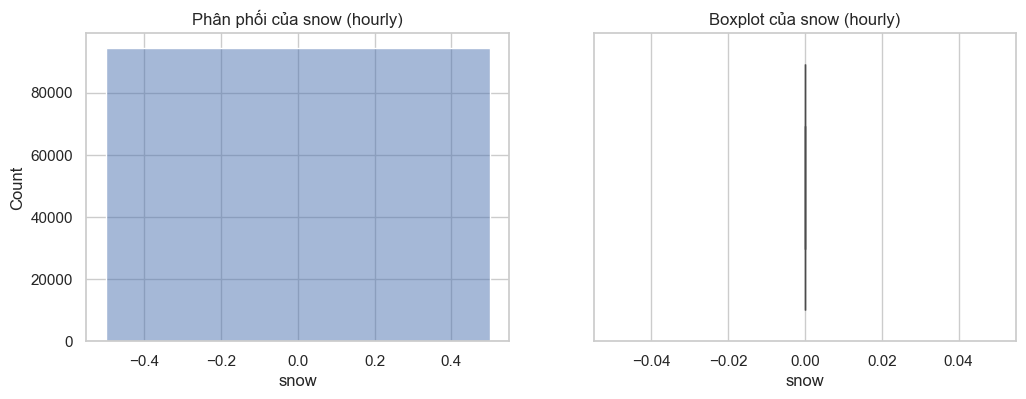

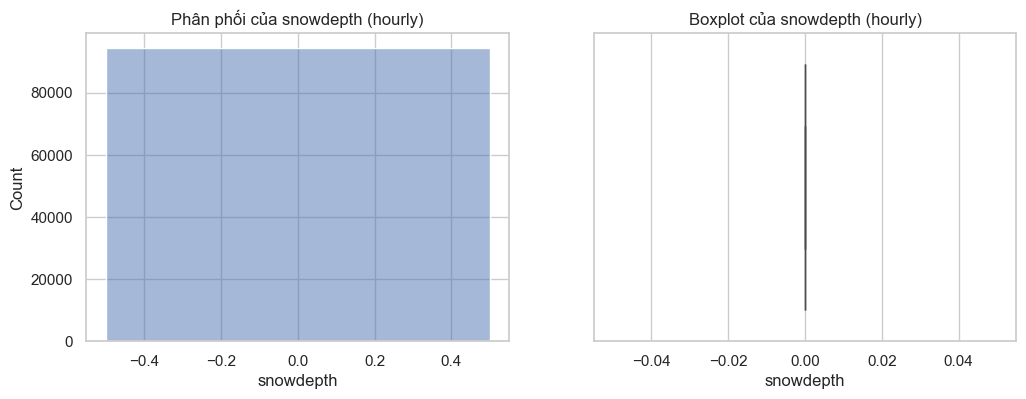

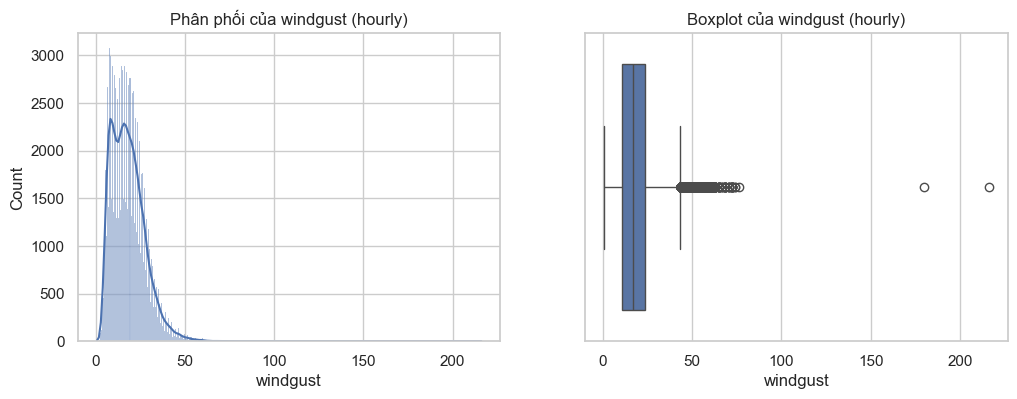

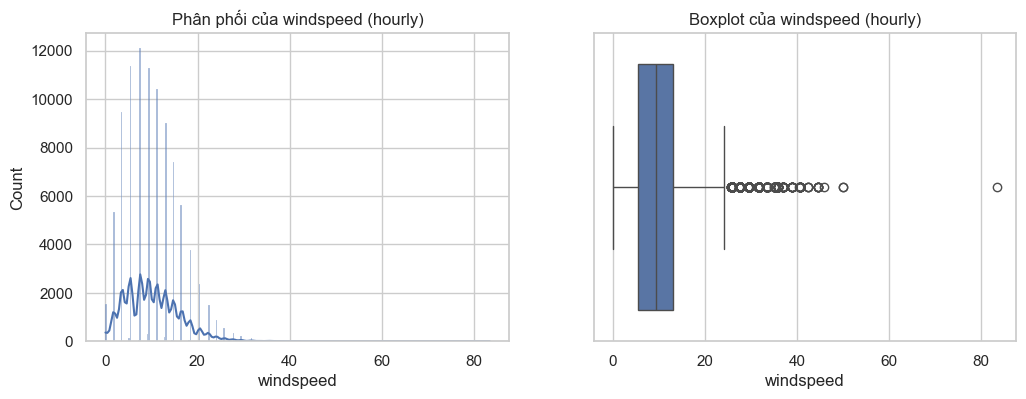

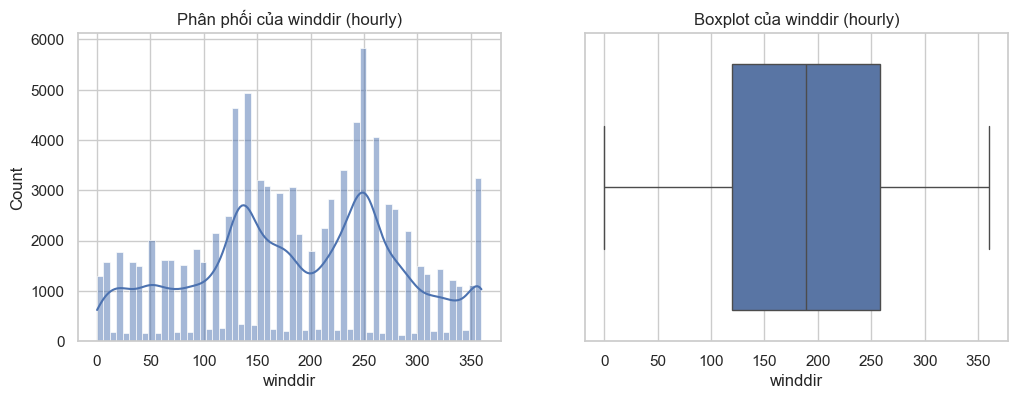

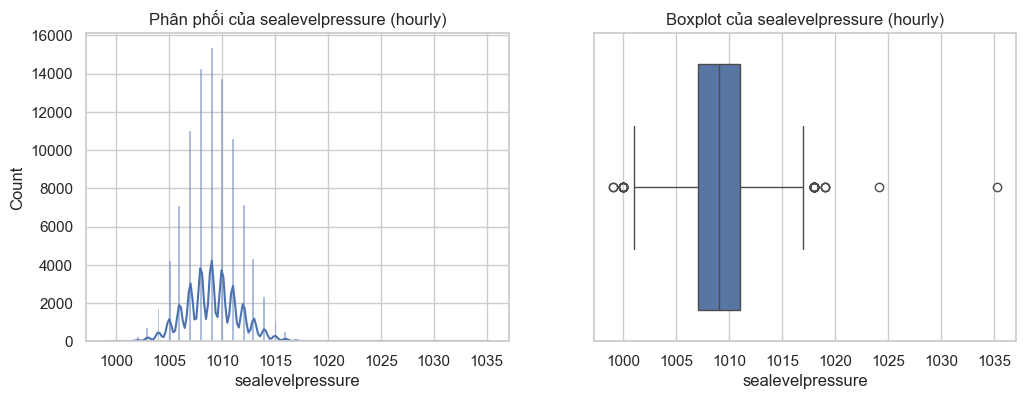

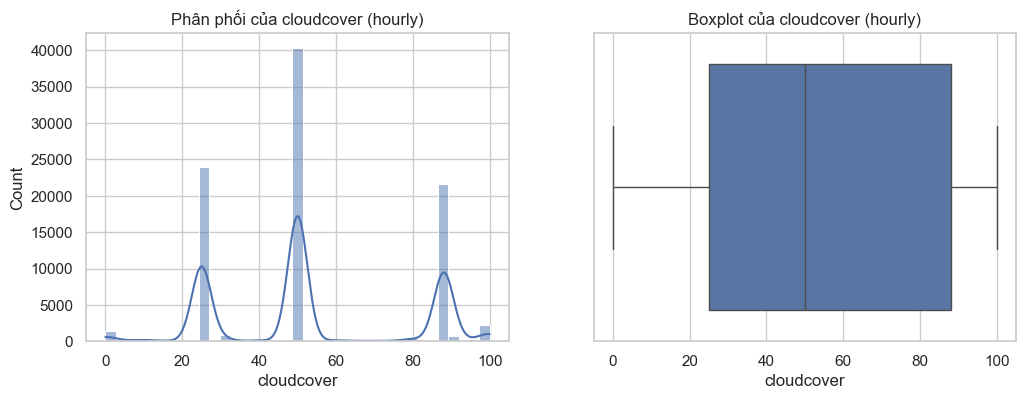

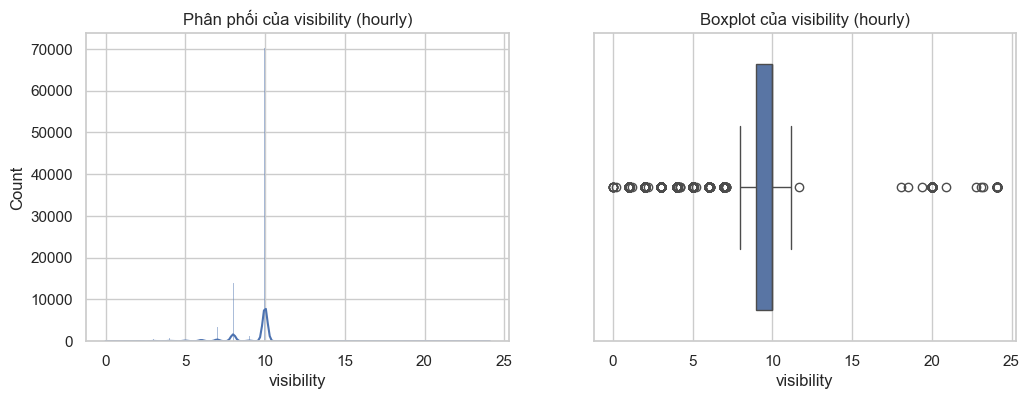

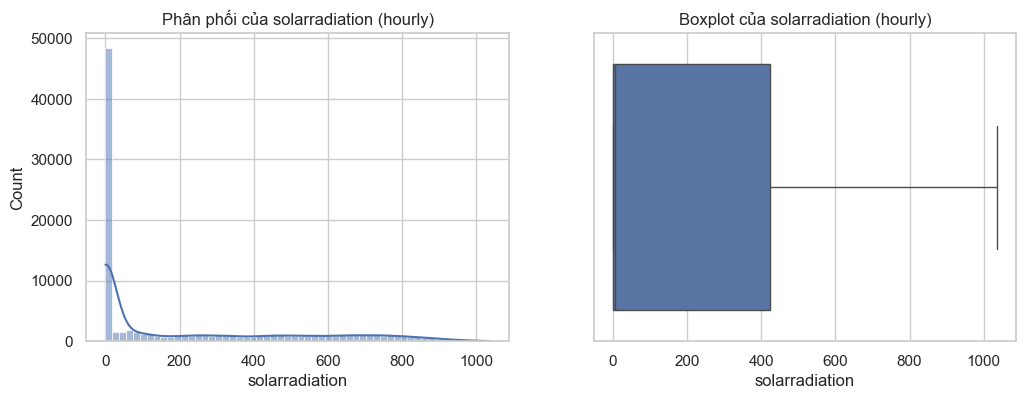

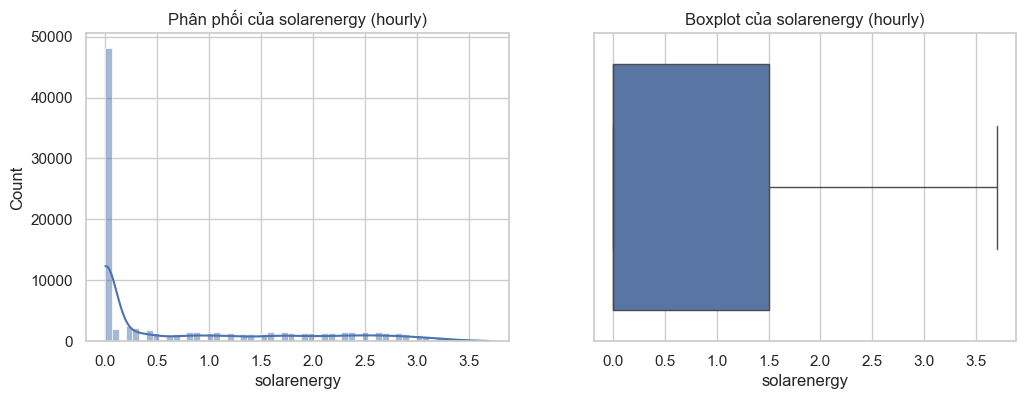

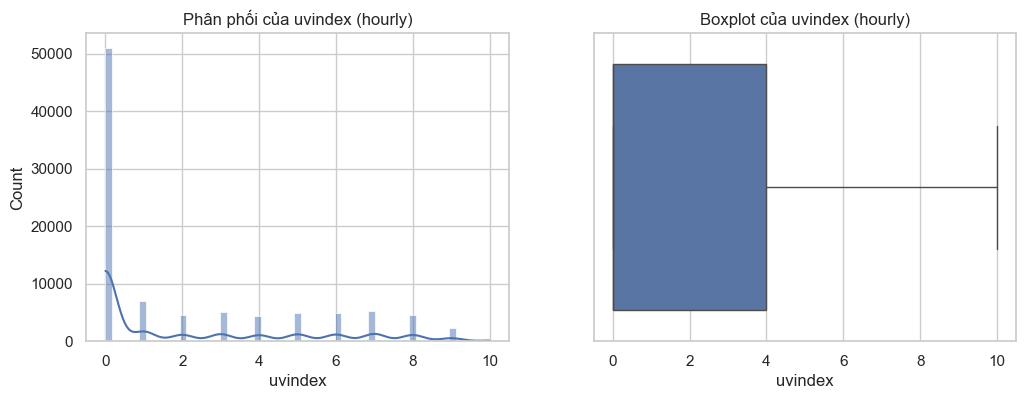

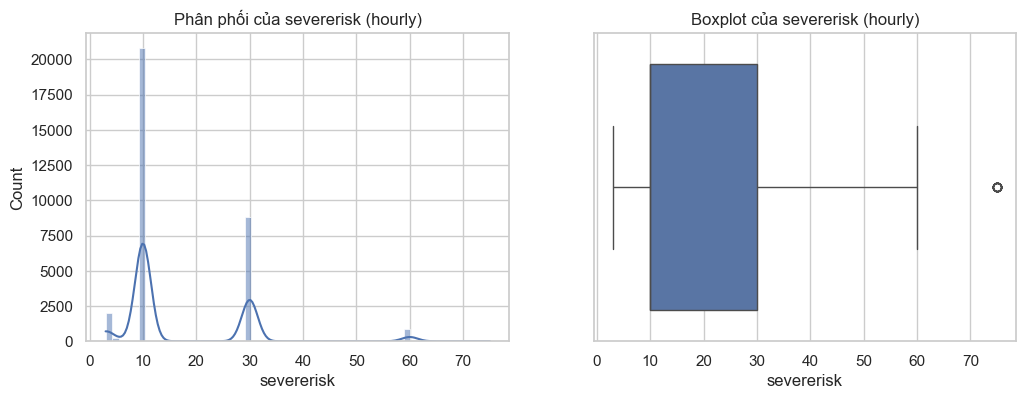

In [6]:

# Biểu đồ phân phối và boxplot (hourly)
for col in numeric_cols_h:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df_hcm_hourly[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f"Phân phối của {col} (hourly)")
    sns.boxplot(x=df_hcm_hourly[col], ax=axes[1])
    axes[1].set_title(f"Boxplot của {col} (hourly)")
    plt.show()


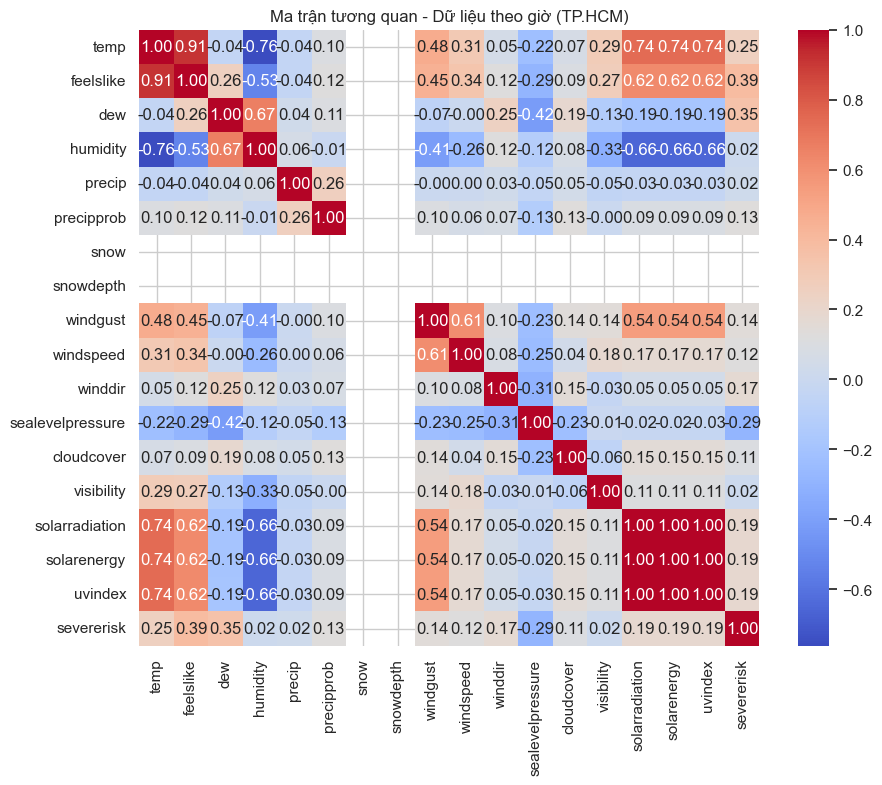

In [7]:

# Heatmap tương quan giữa các biến số (hourly)
if len(numeric_cols_h) > 1:
    corr_h = df_hcm_hourly[numeric_cols_h].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_h, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Ma trận tương quan - Dữ liệu theo giờ (TP.HCM)")
    plt.show()
else:
    print("Không đủ numeric columns để vẽ heatmap (hourly).")



### ✳️ Nhận xét sơ bộ (hourly)
- Quan sát các thống kê và biểu đồ để đánh giá missing, outliers và phân phối.  
- Gợi ý: chuẩn hóa cột thời gian, tách hour/month nếu cần dùng cho ML.


## 📅 PHẦN 2 — PHÂN TÍCH DỮ LIỆU TP.HCM THEO NGÀY (`HCMWeatherDaily.xlsx`)

In [8]:

# Đọc dữ liệu theo ngày TP.HCM
path_hcm_daily = "/Users/user/Desktop/HCM/HCMWeatherDaily.xlsx"
try:
    df_hcm_daily = pd.read_excel(path_hcm_daily, engine='openpyxl')
except Exception as e:
    print("Lỗi khi đọc file daily:", e)
    raise

print("Kích thước dữ liệu daily:", df_hcm_daily.shape)
display(df_hcm_daily.head())


Kích thước dữ liệu daily: (3934, 33)


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"10.82, 106.67",2015-01-01,31.0,23.0,26.6,31.3,23.0,26.9,17.9,60.4,0.0,0,0.00,NaN,0,0,20.5,18.4,26.4,1012.5,52.6,8.5,230.6,19.9,8,NaN,2015-01-01T06:11:34,2015-01-01T17:41:42,0.36,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48894099999,48900099999,VVTS"
1,"10.82, 106.67",2015-01-02,30.0,20.0,25.0,30.3,20.0,25.1,15.7,56.7,0.0,0,0.00,NaN,0,0,21.6,13.0,332.0,1012.9,64.7,9.8,186.2,16.1,7,NaN,2015-01-02T06:11:58,2015-01-02T17:42:15,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48894099999,48900099999,VVTS"
2,"10.82, 106.67",2015-01-03,32.0,23.0,26.7,33.4,23.0,27.4,18.9,63.3,0.2,100,8.33,rain,0,0,23.8,13.0,8.1,1011.9,51.5,9.5,185.8,16.0,8,NaN,2015-01-03T06:12:21,2015-01-03T17:42:47,0.43,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"48894099999,48900099999,VVTS"
3,"10.82, 106.67",2015-01-04,32.0,24.0,27.1,34.8,24.0,28.3,21.2,71.3,0.0,0,0.00,NaN,0,0,22.7,13.0,233.9,1010.2,58.5,8.2,125.8,10.9,4,NaN,2015-01-04T06:12:44,2015-01-04T17:43:20,0.46,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48894099999,48900099999,VVTS"
4,"10.82, 106.67",2015-01-05,30.9,25.0,26.7,33.6,25.0,27.8,22.0,76.3,6.0,100,4.17,rain,0,0,24.8,18.4,148.5,1009.9,78.5,8.7,163.4,14.1,8,NaN,2015-01-05T06:13:05,2015-01-05T17:43:53,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"48894099999,48900099999,VVTS"


In [9]:

# Kiểm tra kiểu dữ liệu và thống kê mô tả (daily)
df_hcm_daily.info()
display(df_hcm_daily.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3934 non-null   object 
 1   datetime          3934 non-null   object 
 2   tempmax           3934 non-null   float64
 3   tempmin           3934 non-null   float64
 4   temp              3934 non-null   float64
 5   feelslikemax      3934 non-null   float64
 6   feelslikemin      3934 non-null   float64
 7   feelslike         3934 non-null   float64
 8   dew               3934 non-null   float64
 9   humidity          3934 non-null   float64
 10  precip            3934 non-null   float64
 11  precipprob        3934 non-null   int64  
 12  precipcover       3934 non-null   float64
 13  preciptype        3013 non-null   object 
 14  snow              3934 non-null   int64  
 15  snowdepth         3934 non-null   int64  
 16  windgust          3934 non-null   float64


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
count,3934,3934,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3013,3934.0,3934.0,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,1368.000000,3934,3934,3934.000000,3934,3934,3934,3934
unique,1,3934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3934,3934,NaN,4,28,3,11
top,"10.82, 106.67",2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01T06:11:34,2015-01-01T17:41:42,NaN,"Rain, Partially cloudy",Partly cloudy throughout the day.,rain,"48894099999,48900099999,VVTS"
freq,3934,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,2975,853,2991,3724
mean,NaN,NaN,33.121988,25.111439,28.451652,38.539832,25.788587,31.650102,23.497051,76.545196,5.216218,76.029487,10.398218,NaN,0.0,0.0,31.887697,20.214845,185.484698,1009.078012,53.164514,9.331901,213.128495,18.401779,7.803762,27.368421,NaN,NaN,0.483907,NaN,NaN,NaN,NaN
std,NaN,NaN,1.809156,1.610926,1.390713,3.286620,2.933660,2.936379,2.263015,9.797815,12.374563,42.695775,13.303015,NaN,0.0,0.0,10.510896,5.955469,80.384755,2.092720,14.376700,0.779568,49.684578,4.295429,1.493652,17.478722,NaN,NaN,0.288522,NaN,NaN,NaN,NaN
min,NaN,NaN,24.900000,18.000000,22.800000,24.900000,18.000000,22.800000,12.700000,49.200000,0.000000,0.000000,0.000000,NaN,0.0,0.0,8.300000,7.600000,0.000000,1001.500000,8.800000,5.500000,0.000000,0.000000,0.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,32.000000,24.000000,27.500000,36.400000,24.000000,29.700000,22.400000,69.600000,0.100000,100.000000,4.170000,NaN,0.0,0.0,24.800000,16.600000,128.225000,1007.600000,42.800000,8.900000,185.575000,16.025000,7.000000,10.000000,NaN,NaN,0.250000,NaN,NaN,NaN,NaN
50%,NaN,NaN,33.000000,25.000000,28.400000,39.100000,25.000000,31.400000,24.200000,77.400000,0.800000,100.000000,4.170000,NaN,0.0,0.0,29.900000,18.400000,181.200000,1009.000000,52.100000,9.500000,221.250000,19.100000,8.000000,30.000000,NaN,NaN,0.480000,NaN,NaN,NaN,NaN
75%,NaN,NaN,34.000000,26.000000,29.300000,40.500000,26.000000,33.500000,25.100000,84.200000,5.000000,100.000000,12.500000,NaN,0.0,0.0,36.700000,22.300000,250.675000,1010.400000,63.200000,9.900000,249.900000,21.600000,9.000000,30.000000,NaN,NaN,0.750000,NaN,NaN,NaN,NaN


In [10]:

# Kiểm tra missing values và duplicates (daily)
missing_d = df_hcm_daily.isnull().sum()
missing_pct_d = (df_hcm_daily.isnull().mean() * 100).round(2)
print("Số lượng giá trị thiếu (daily):\n", missing_d)
print("\nTỷ lệ thiếu (%) (daily):\n", missing_pct_d)

dupes_d = df_hcm_daily.duplicated().sum()
print(f"\nSố dòng trùng lặp (daily): {dupes_d}")


Số lượng giá trị thiếu (daily):
 name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype           921
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2566
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

Tỷ lệ thiếu (%) (daily):
 name                 0.00
datetime             0.00
tempmax              0.00
tempmin              0.0

In [11]:

# Phát hiện outliers bằng phương pháp IQR (daily)
numeric_cols_d = df_hcm_daily.select_dtypes(include=[np.number]).columns

Q1_d = df_hcm_daily[numeric_cols_d].quantile(0.25)
Q3_d = df_hcm_daily[numeric_cols_d].quantile(0.75)
IQR_d = Q3_d - Q1_d

outliers_d = ((df_hcm_daily[numeric_cols_d] < (Q1_d - 1.5 * IQR_d)) | 
              (df_hcm_daily[numeric_cols_d] > (Q3_d + 1.5 * IQR_d))).sum()

print("Số lượng outliers (theo từng cột) - daily:\n", outliers_d)


Số lượng outliers (theo từng cột) - daily:
 tempmax              69
tempmin              55
temp                 52
feelslikemax         41
feelslikemin        697
feelslike            34
dew                 144
humidity              0
precip              436
precipprob          943
precipcover         590
snow                  0
snowdepth             0
windgust            135
windspeed           233
winddir               0
sealevelpressure     31
cloudcover           14
visibility           74
solarradiation       85
solarenergy          84
uvindex              68
severerisk            7
moonphase             0
dtype: int64


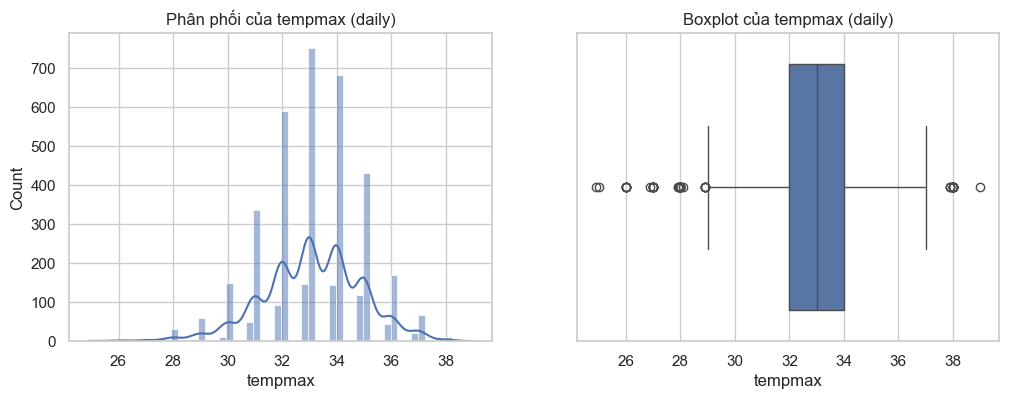

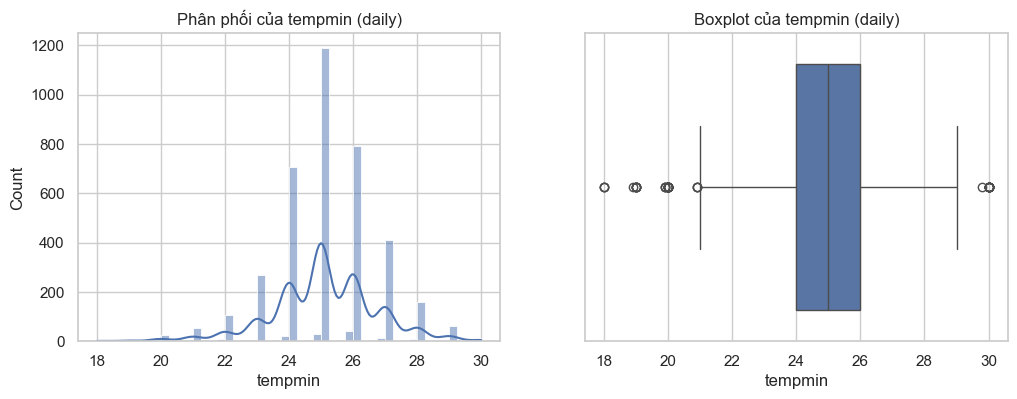

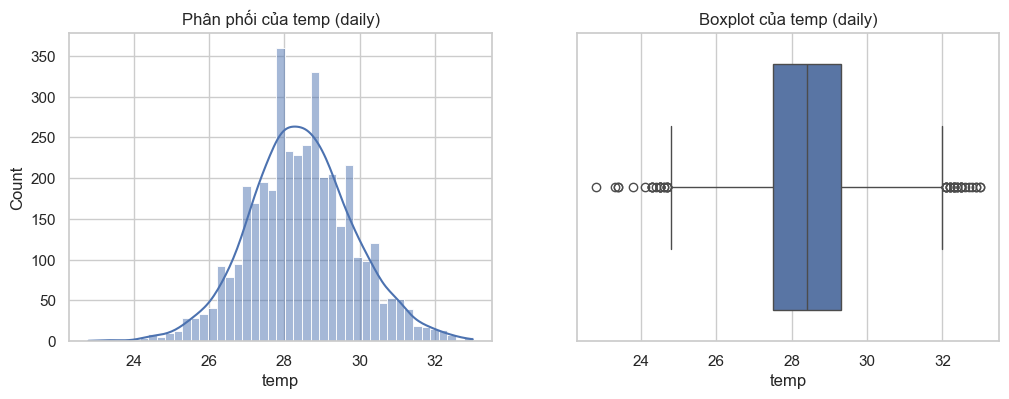

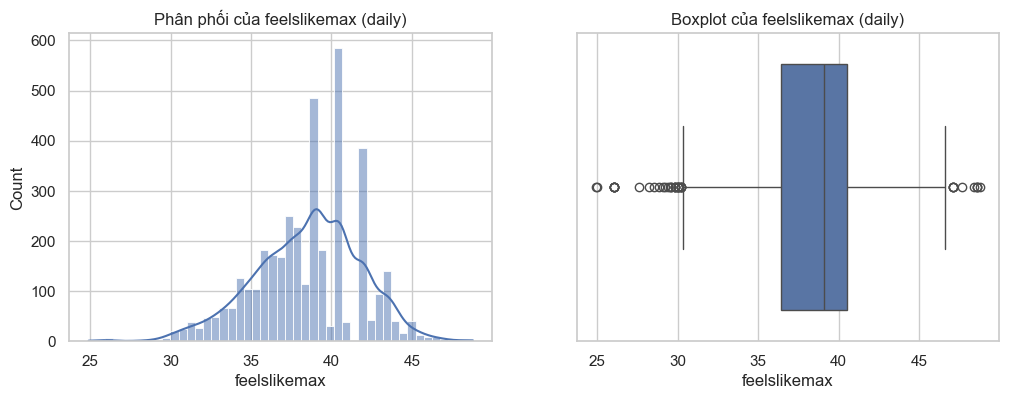

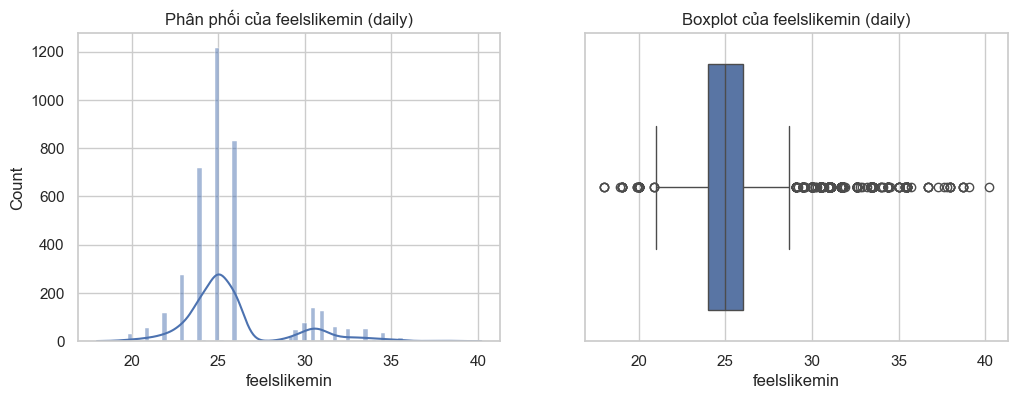

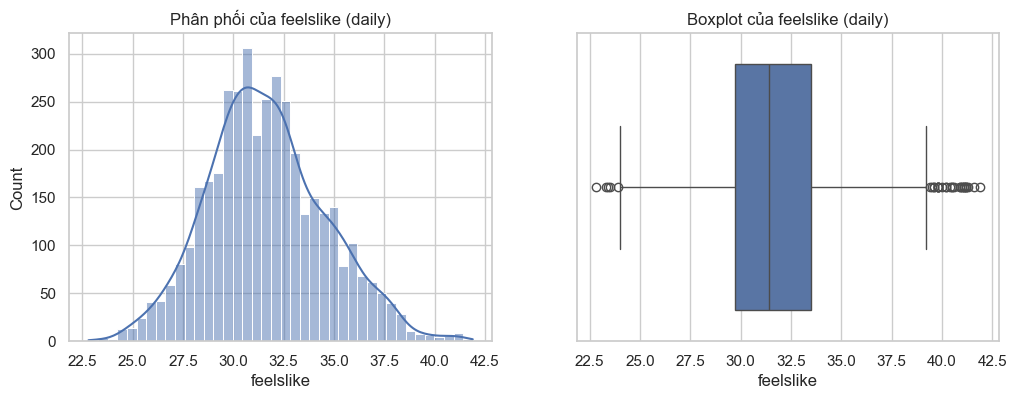

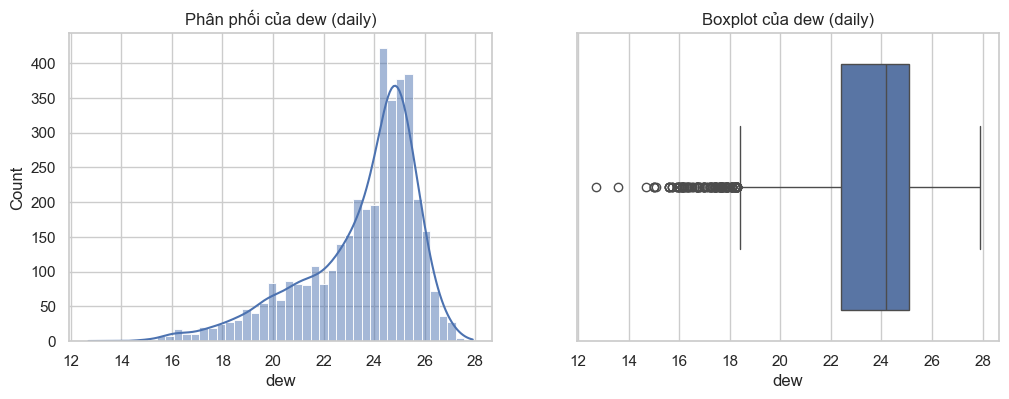

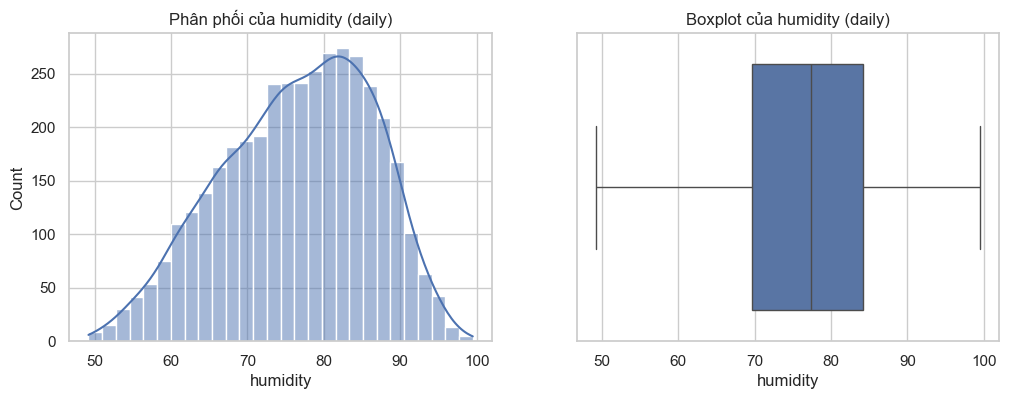

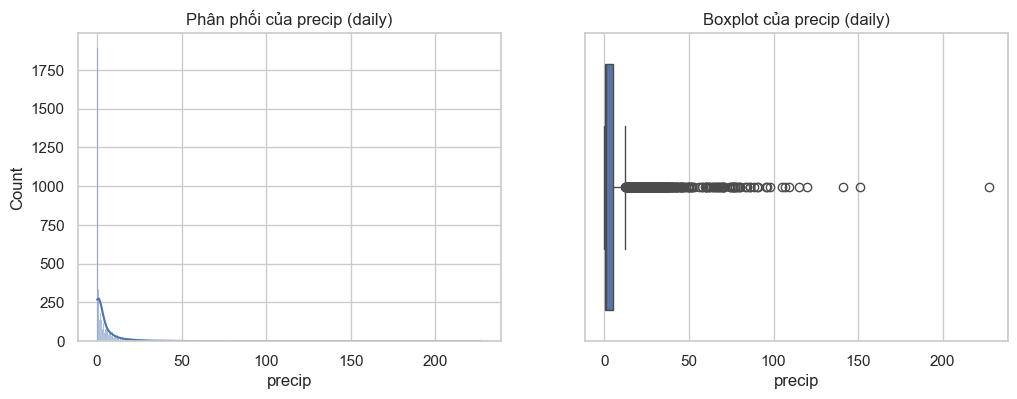

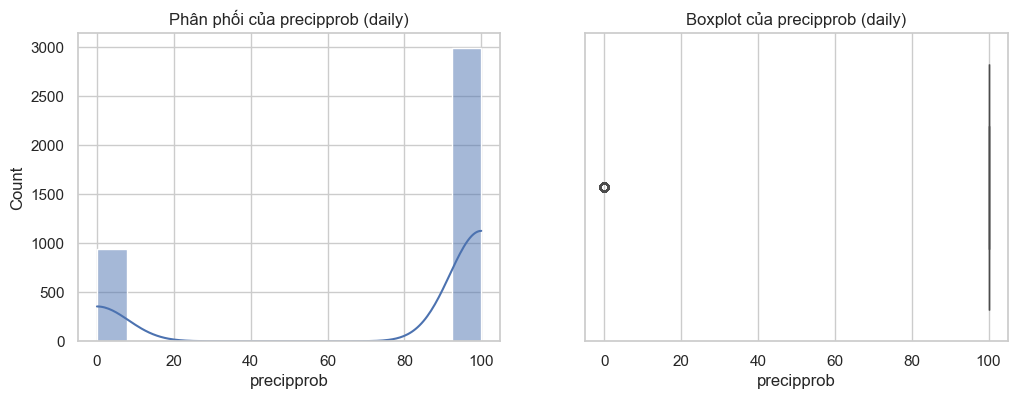

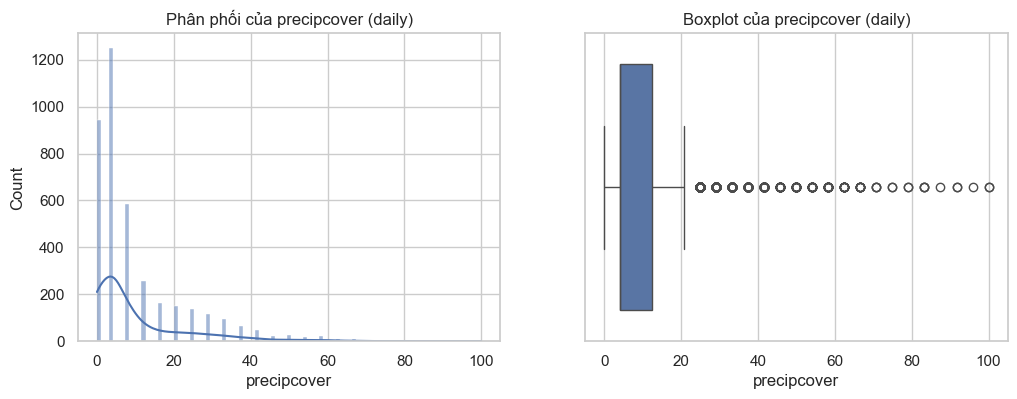

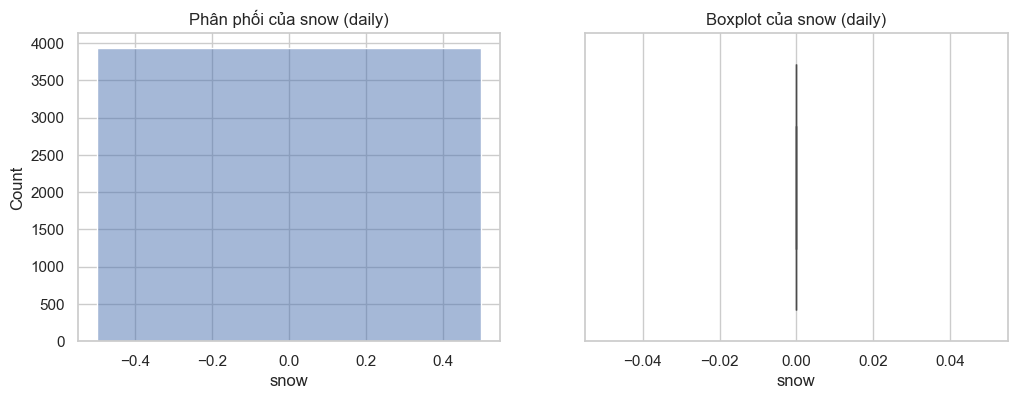

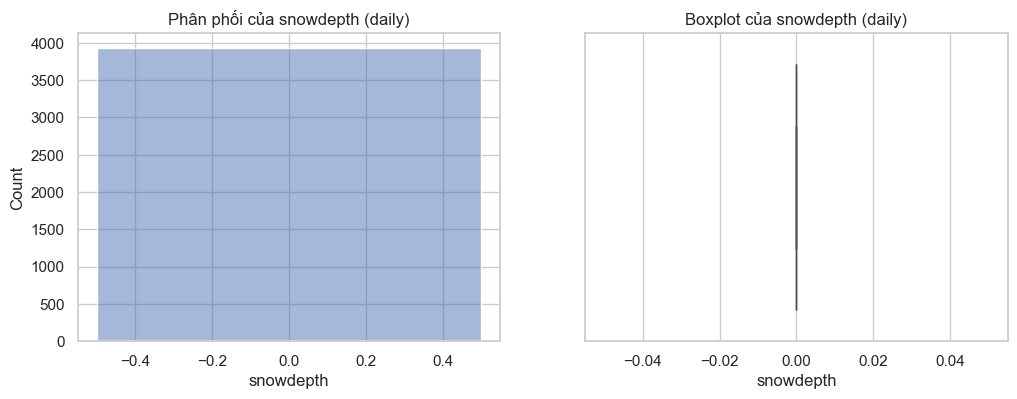

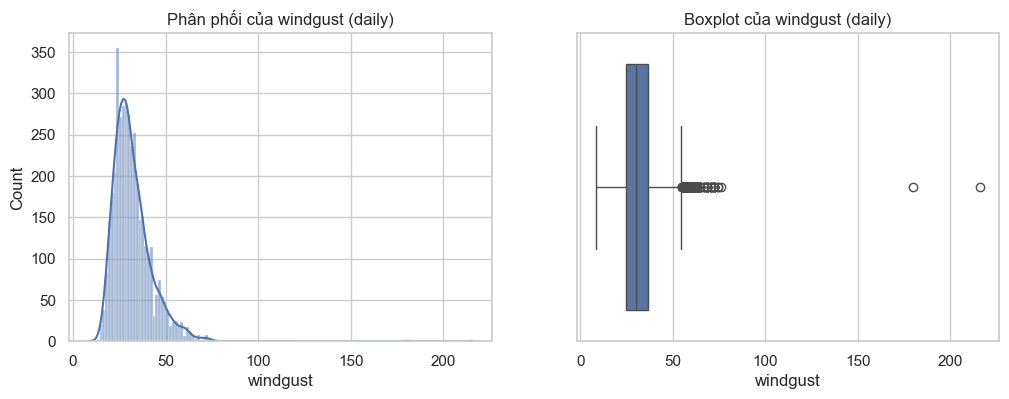

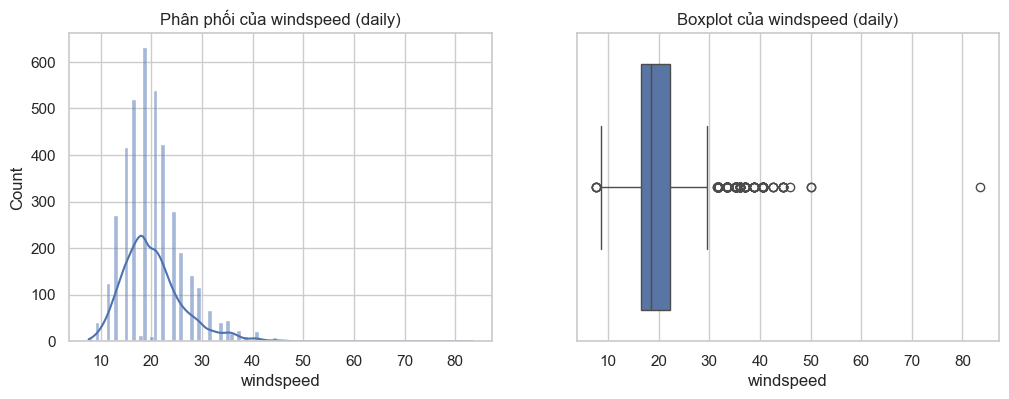

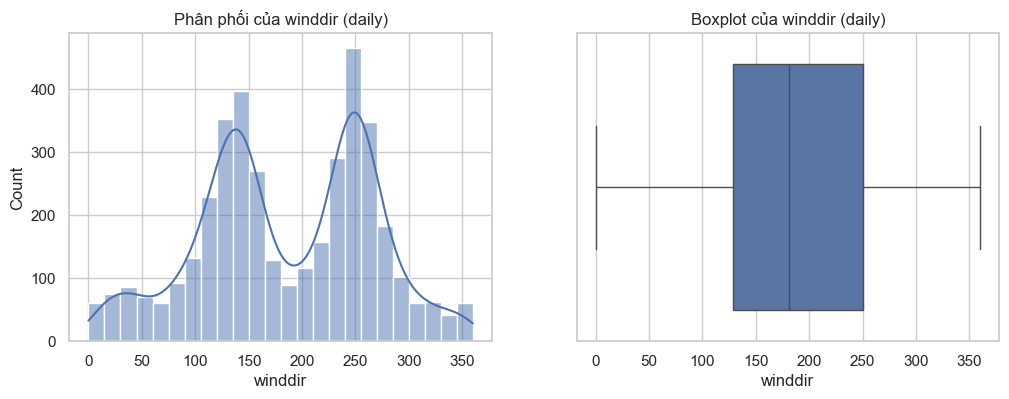

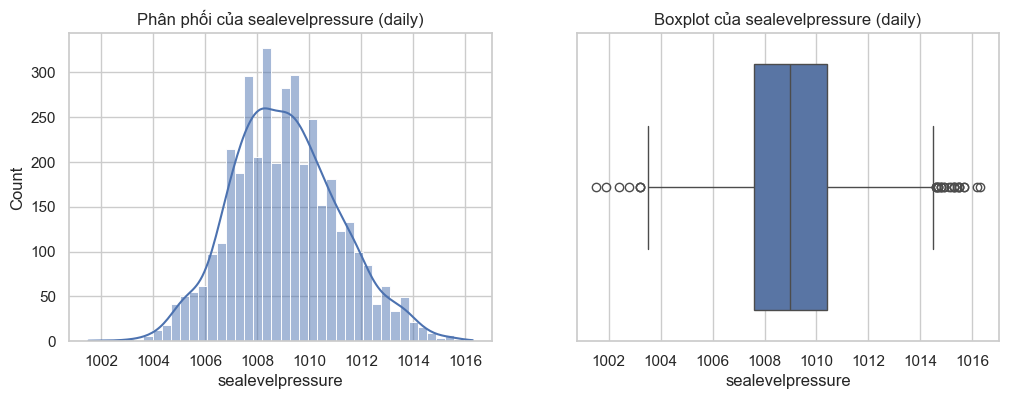

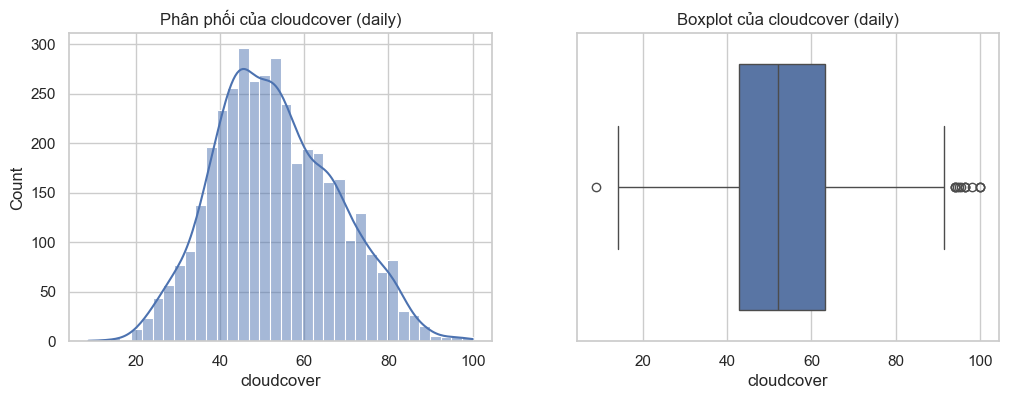

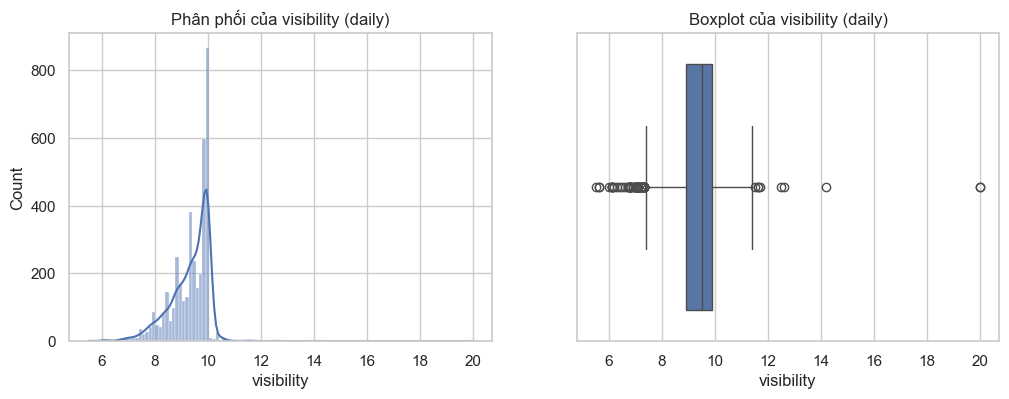

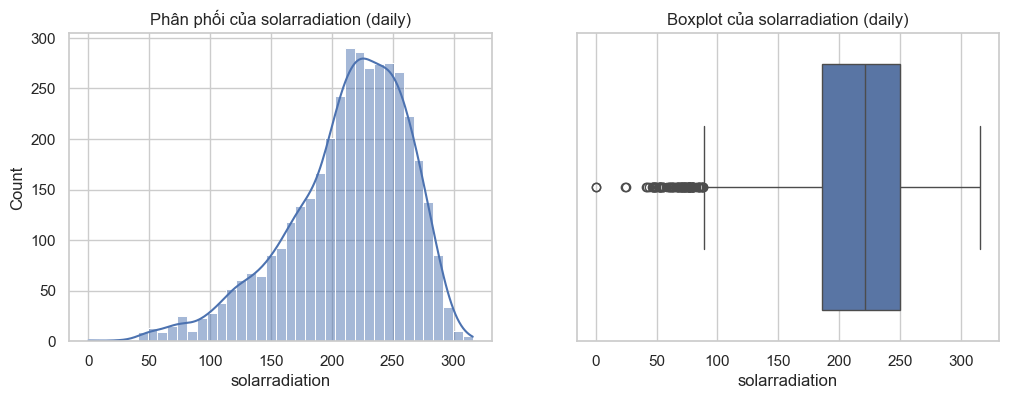

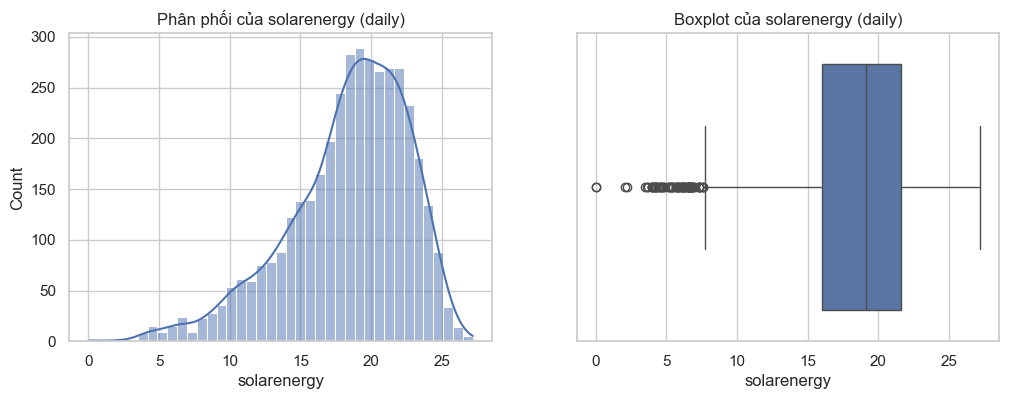

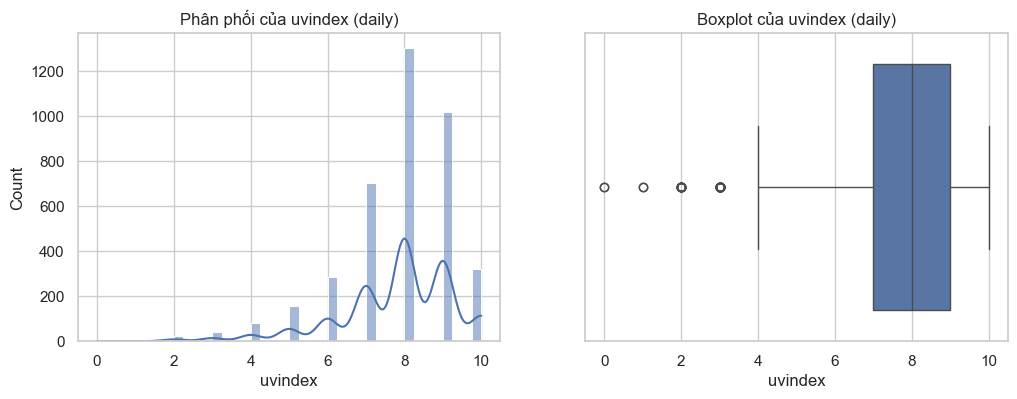

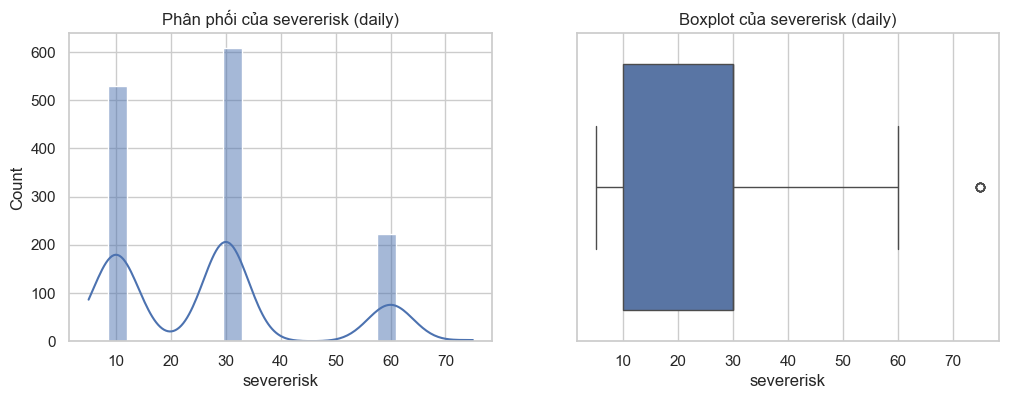

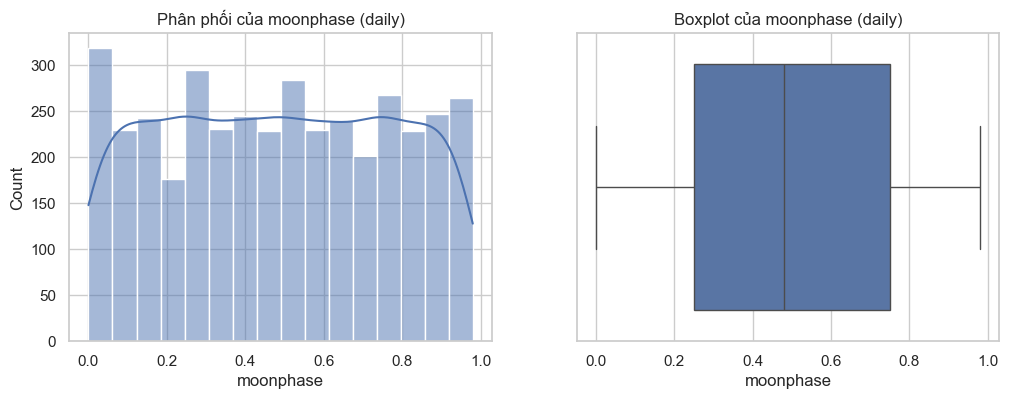

In [12]:

# Biểu đồ phân phối và boxplot (daily)
for col in numeric_cols_d:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df_hcm_daily[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f"Phân phối của {col} (daily)")
    sns.boxplot(x=df_hcm_daily[col], ax=axes[1])
    axes[1].set_title(f"Boxplot của {col} (daily)")
    plt.show()


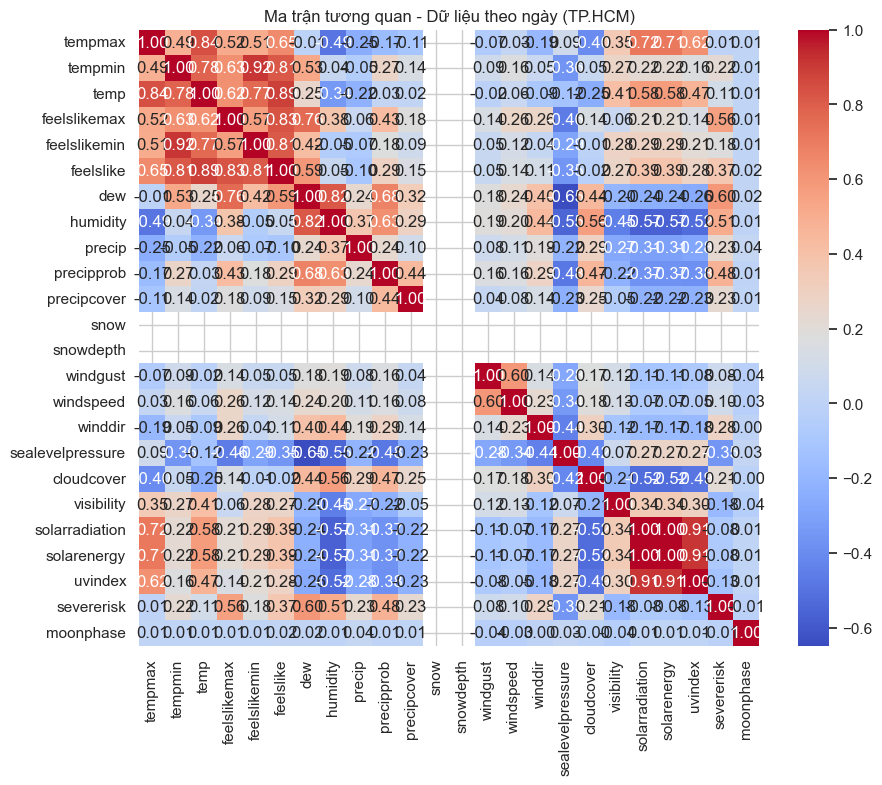

In [13]:

# Heatmap tương quan giữa các biến số (daily)
if len(numeric_cols_d) > 1:
    corr_d = df_hcm_daily[numeric_cols_d].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_d, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Ma trận tương quan - Dữ liệu theo ngày (TP.HCM)")
    plt.show()
else:
    print("Không đủ numeric columns để vẽ heatmap (daily).")



## 🧩 KẾT LUẬN CHUNG
- Cả hai bộ dữ liệu hourly & daily cần kiểm tra kỹ missing and outliers trước khi đưa vào ML.  
- Nên đồng bộ tên cột và format thời gian, tách các feature thời gian (hour, day, month, weekday).  
- Tiếp theo: xử lý missing (interpolate hoặc fill), loại bỏ/winsorize outliers, chuẩn hóa dữ liệu, và tạo feature theo thời gian.

---
